
**Summative Assessment 1.1 - Create a Linear Regression Dataset**


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2021.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2024.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2020.csv
/kaggle/input/world-happiness/2023.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2022.csv
/kaggle/input/world-happiness/2016.csv


In [ ]:
#1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#2 CheckS method for either the Folder dataset containing CSV files

csv_folder_path = '/kaggle/input/world-happiness/'

# Initialize an empty list to store DataFrames
dfs = []


In [ ]:
# Load the CSV files for years 2015 to 2024
for year in range(2015, 2025):
    file_path = f'{csv_folder_path}{year}.csv'  # Indented line inside the loop
    df = pd.read_csv(file_path)  # Indented line inside the loop
    df['Year'] = year  # Indented line inside the loop
    dfs.append(df)  # Indented line inside the loop


In [ ]:
# 3: noting the datasets present
print(df.head()) # Check first few rows to understand the structure
print(df.info()) # Check data types and null values
print(df.describe()) # Get statistical overview

  Country name  Happiness Rank  Happiness score  Upperwhisker  Lowerwhisker  \
0      Finland               1            7.741         7.815         7.667   
1      Denmark               2            7.583         7.665         7.500   
2      Iceland               3            7.525         7.618         7.433   
3       Sweden               4            7.344         7.422         7.267   
4       Israel               5            7.341         7.405         7.277   

   Economy (GDP per Capita)\t  Social support  Healthy life expectancy  \
0                       1.844           1.572                    0.695   
1                       1.908           1.520                    0.699   
2                       1.881           1.617                    0.718   
3                       1.878           1.501                    0.724   
4                       1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Perceptions of corruption  Year  
0

In [ ]:
# Sorts and print the column names of dataset
print(df.columns)


Index(['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker',
       'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year'],
      dtype='object')


In [ ]:
# Using the saved column names prints
print(df.columns.tolist())

['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']


In [ ]:
#4 Data Cleaning and exceptions
# Drops rows if any of the required columns are missing

df.dropna(subset=[
    'Happiness score',                         # Target variable
    'Economy (GDP per Capita)\t',              # GDP per capita (note: includes a tab character)
    'Social support',                          # Social Support
    'Healthy life expectancy',                 # Healthy Life Expectancy
    'Freedom to make life choices',            # Freedom
    'Generosity',                              # Generosity
    'Perceptions of corruption'                # Perceived corruption
], inplace=True)

#Optionally, rename columns for clarity and simplicity
df.rename(columns={
    'Happiness score': 'Happiness_Score',
    'Economy (GDP per Capita)\t': 'GDP_per_capita',
    'Social support': 'Social_Support',
    'Healthy life expectancy': 'Healthy_Life_Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Perceptions of corruption': 'Perceived_Corruption'
}, inplace=True)

# Verify the column names again
print(df.columns)


Index(['Country name', 'Happiness Rank', 'Happiness_Score', 'Upperwhisker',
       'Lowerwhisker', 'GDP_per_capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom', 'Generosity',
       'Perceived_Corruption', 'Year'],
      dtype='object')


In [ ]:
#  5: Independent and Dependent Variables for data in Linear Regression
X = df[['GDP_per_capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom', 'Generosity', 'Perceived_Corruption']]  # Independent variables
y = df['Happiness_Score']  # Dependent variable (target)


In [ ]:
# 6: Splits the Dataset into testing Sets (For training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 7: Creates the Linear Regression Model
model = LinearRegression()


In [ ]:
#  8: Trains the model using saved data from the saved empty list
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 9: Making Predictions on Test Data
y_pred = model.predict(X_test)

In [ ]:
#  10: Evaluates model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 0.23539426916732203
R² Score: 0.8429546661545323


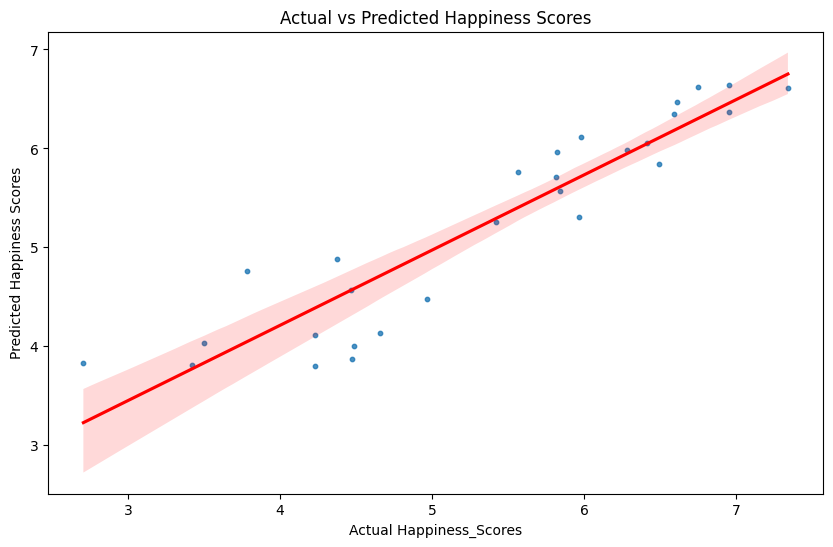

In [ ]:
# 11: Visual result. Test in VS first (I think)
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Actual vs Predicted Happiness Scores')
plt.xlabel('Actual Happiness_Scores')
plt.ylabel('Predicted Happiness Scores')
plt.show()

In [ ]:
#12 Show the Coefficients values
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')

Intercept: 1.2745259887133464
Coefficients: [0.47812885 1.36747375 1.34342112 1.74810414 0.39980743 1.16616444]
